In [1]:
from stable_baselines3 import PPO
# 加载模型
model = PPO.load("../output/checkpoints/default_8/put_back_v1_7040000_steps.zip")

In [2]:
import numpy as np
r = np.linspace(0, 40.0, 18000)
a = np.array([12.6, 13.55])
b = a
cartesian_coord = b-a
rho = np.linalg.norm(cartesian_coord)
phi = np.arctan2(cartesian_coord[1], cartesian_coord[0])
relative_coord = np.array([rho, phi])

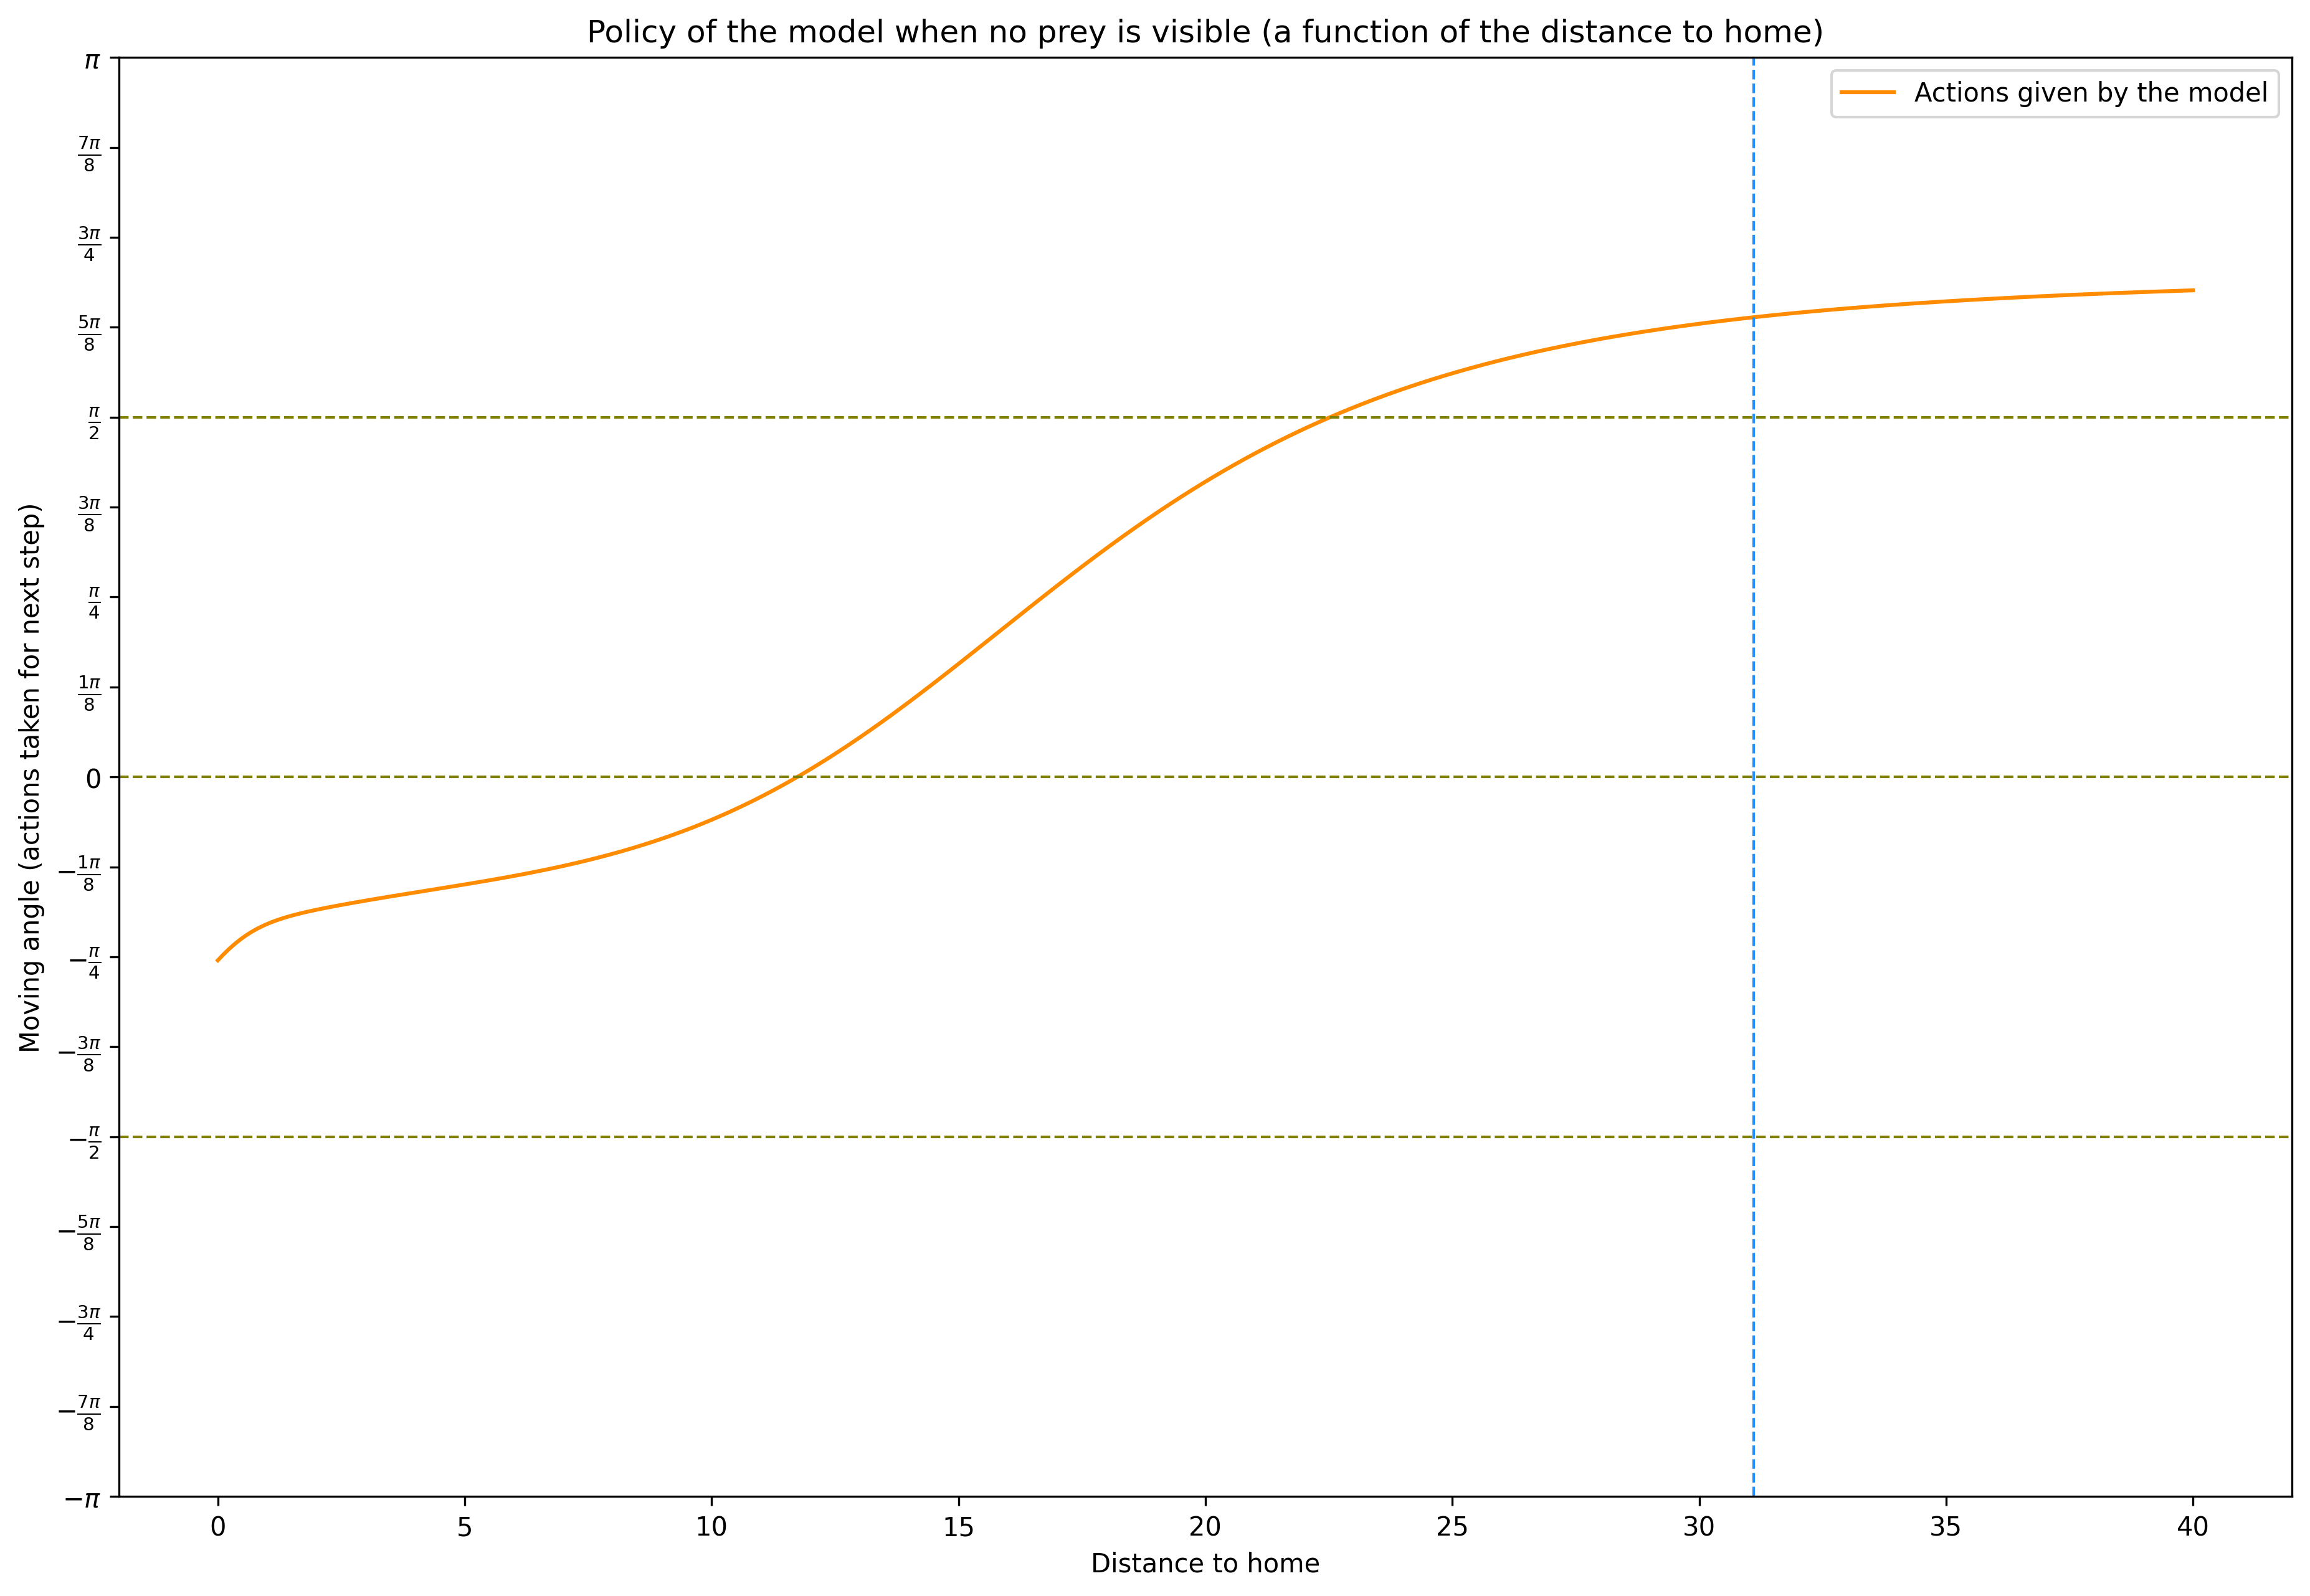

In [3]:
import matplotlib.pyplot as plt
actions = []
for distance_to_home in r:
    obs = {
        "distance_to_home": np.array([distance_to_home]),
        "average_position_of_visible_preys": relative_coord,
        "closest_prey_position": relative_coord
    }
    action, _ = model.predict(obs, deterministic=True)
    actions.append(action)
plt.figure(figsize=(15, 10), dpi=300)
npactions = np.array(actions)*np.pi
plt.plot(r, npactions, label="Actions given by the model", color="darkorange", linewidth=1.5)
# Plot moving average
# window_size = 300
# cumsum_vec = np.cumsum(npactions)
# ma_vec = (cumsum_vec[window_size:] - cumsum_vec[:-window_size]) / window_size
# half_window = window_size // 2
# plt.plot(r[half_window:-half_window], ma_vec, label="Moving average", color="rebeccapurple", linewidth=1.5)
# Plot -pi to pi
plt.ylim(-np.pi, np.pi)
# ticks in pi
plt.yticks(np.linspace(-np.pi, np.pi, 17), 
        [
            r"$-\pi$",r"$-\frac{7\pi}{8}$", r"$-\frac{3\pi}{4}$", r"$-\frac{5\pi}{8}$", 
            r"$-\frac{\pi}{2}$", r"$-\frac{3\pi}{8}$", r"$-\frac{\pi}{4}$", r"$-\frac{1\pi}{8}$", 
            r"$0$", 
            r"$\frac{1\pi}{8}$", r"$\frac{\pi}{4}$", 
            r"$\frac{3\pi}{8}$", r"$\frac{\pi}{2}$", 
            r"$\frac{5\pi}{8}$", r"$\frac{3\pi}{4}$", r"$\frac{7\pi}{8}$", r"$\pi$"
        ])
# add a horizontal line at 0
plt.axhline(0, color='olive', linewidth=1, linestyle="--")
plt.axhline(-np.pi/2, color='olive', linewidth=1, linestyle="--")
plt.axhline(np.pi/2, color='olive', linewidth=1, linestyle="--")
# add a vertical line at 0
# plt.axvline(31.4, color='dodgerblue', linewidth=1, linestyle="--", label = r'$\sqrt{0.618}\times 40$')
plt.axvline(31.1, color='dodgerblue', linewidth=1, linestyle="--")
plt.xlabel("Distance to home")
plt.ylabel("Moving angle (actions taken for next step)")# (action>0 means counterclockwise, action<0 means clockwise)
plt.title("Policy of the model when no prey is visible (a function of the distance to home)")
# add a legend
plt.legend()
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def visualize_policy_heatmap(model, distance_to_home, closest_radius, mean_radius, num_points=50):
    angles = np.linspace(-np.pi, np.pi, num_points)
    grid_x, grid_y = np.meshgrid(angles, angles)
    action_values = np.zeros_like(grid_x)

    for i in range(num_points):
        for j in range(num_points):
            obs = {
                "distance_to_home": np.array([distance_to_home]),
                "average_position_of_visible_preys": np.array([mean_radius, grid_x[i, j]]),
                "closest_prey_position": np.array([closest_radius, grid_y[i, j]])
            }
            action, _ = model.predict(obs, deterministic=True)
            action_values[i, j] = action

    fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
    pos = ax.imshow(action_values, extent=(-np.pi, np.pi, -np.pi, np.pi), origin='lower', cmap='twilight_shifted', 
                    norm=Normalize(vmin=-1.0, vmax=1.0))
    ax.set_xlabel('Average Position Angle (radians)')
    ax.set_ylabel('Closest Prey Angle (radians)')
    ax.set_title('Policy Action Heatmap')
    fig.colorbar(pos, ax=ax, label='Action Value')
    plt.xticks(np.linspace(-np.pi, np.pi, 5), [f"{x:.2f}" for x in np.linspace(-np.pi, np.pi, 5)])
    plt.yticks(np.linspace(-np.pi, np.pi, 5), [f"{y:.2f}" for y in np.linspace(-np.pi, np.pi, 5)])
    plt.grid(False)
    plt.show()



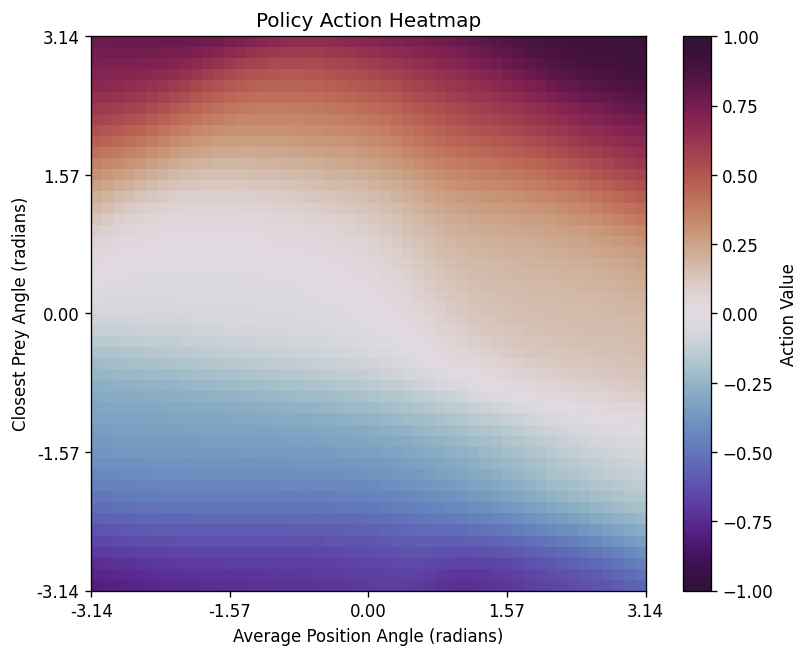

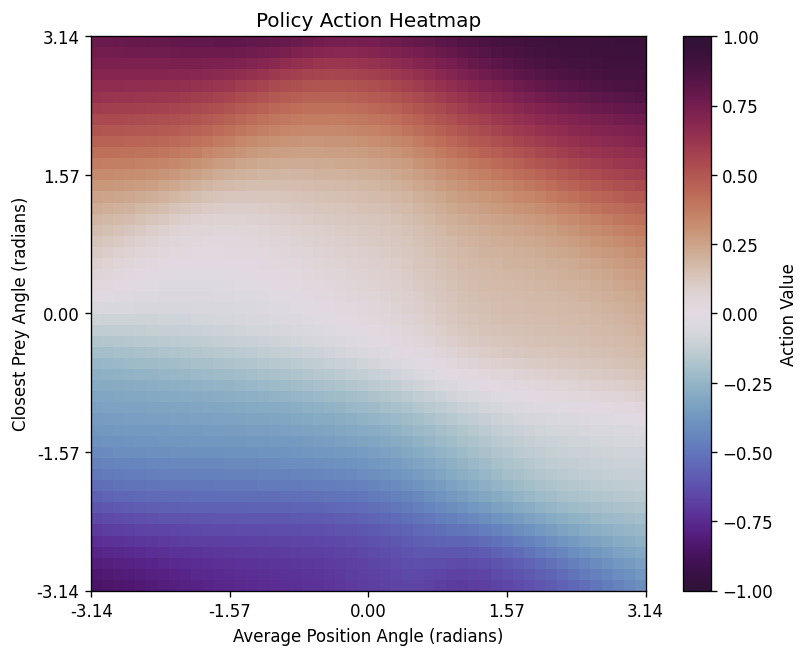

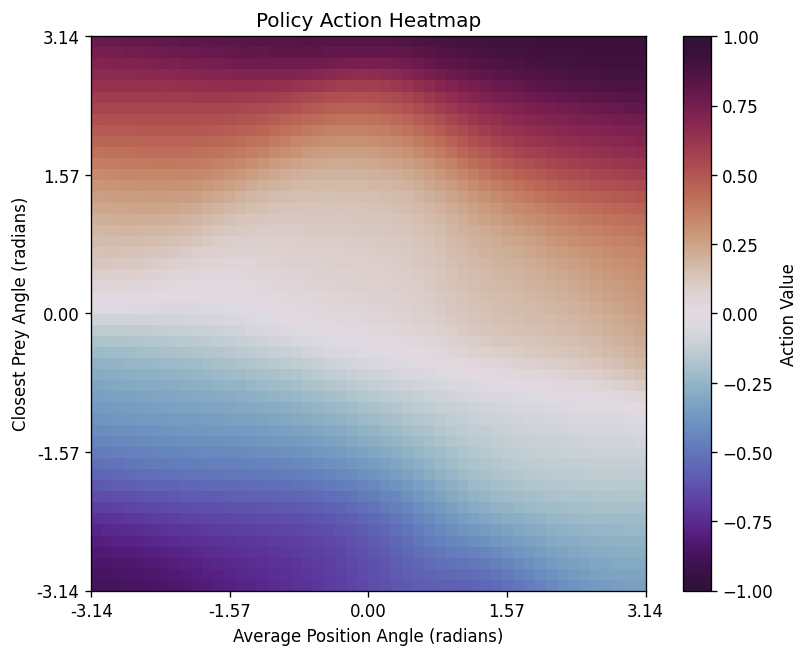

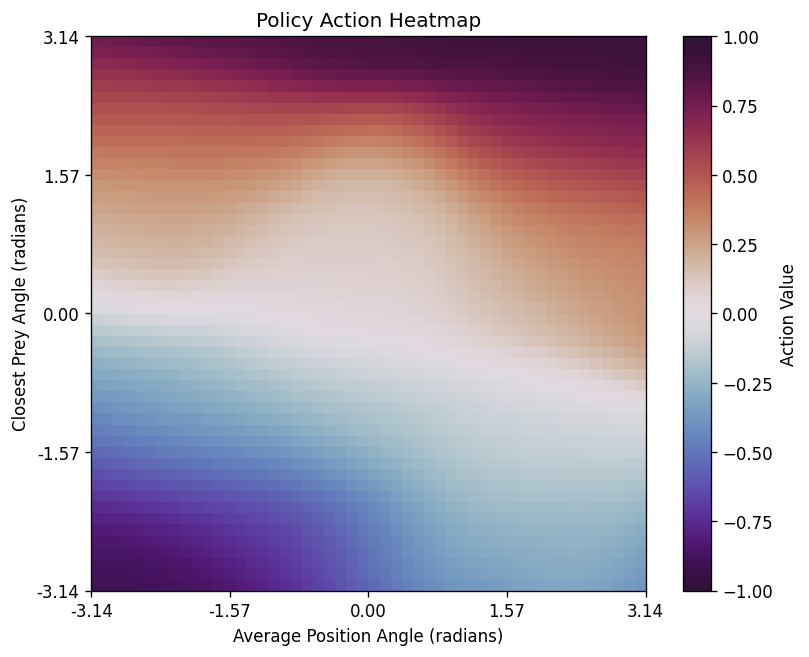

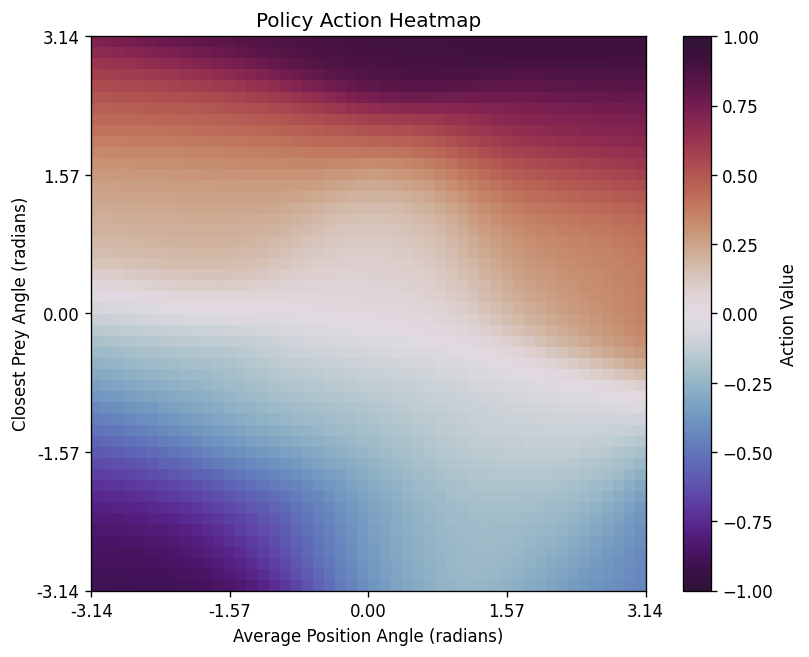

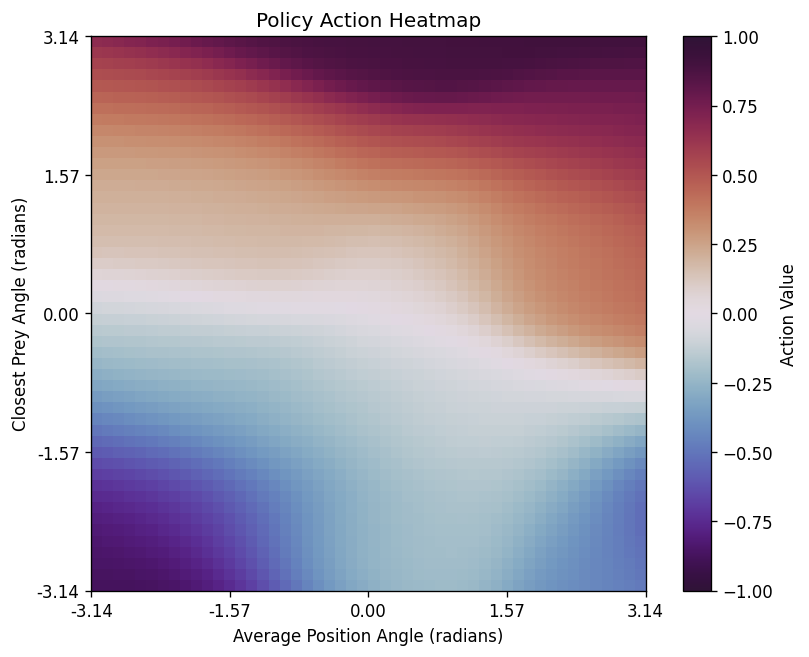

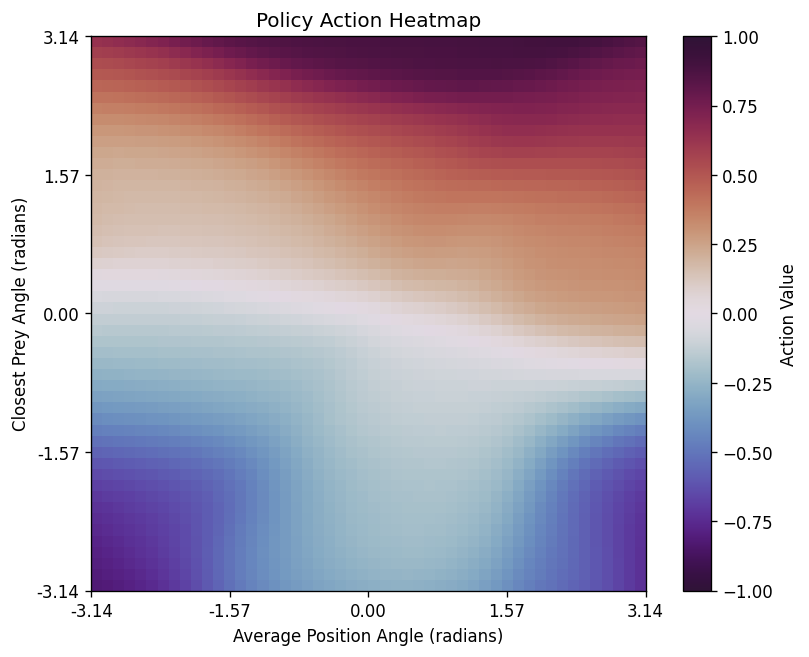

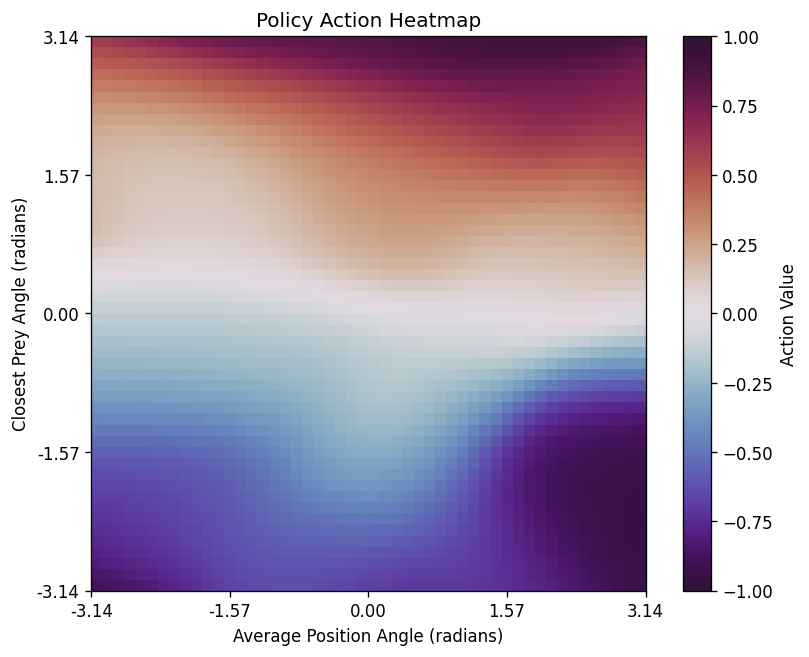

In [5]:
# 可以用下面的代码来调用函数
visualize_policy_heatmap(model, distance_to_home=35.0, closest_radius=4, mean_radius=4, num_points=50)
visualize_policy_heatmap(model, distance_to_home=30.0, closest_radius=4, mean_radius=4, num_points=50)
visualize_policy_heatmap(model, distance_to_home=25.0, closest_radius=4, mean_radius=4, num_points=50)
visualize_policy_heatmap(model, distance_to_home=20.0, closest_radius=4, mean_radius=4, num_points=50)
visualize_policy_heatmap(model, distance_to_home=15.0, closest_radius=4, mean_radius=4, num_points=50)
visualize_policy_heatmap(model, distance_to_home=10.0, closest_radius=4, mean_radius=4, num_points=50)
visualize_policy_heatmap(model, distance_to_home=5.0, closest_radius=4, mean_radius=4, num_points=50)
visualize_policy_heatmap(model, distance_to_home=0.0, closest_radius=4, mean_radius=4, num_points=50)

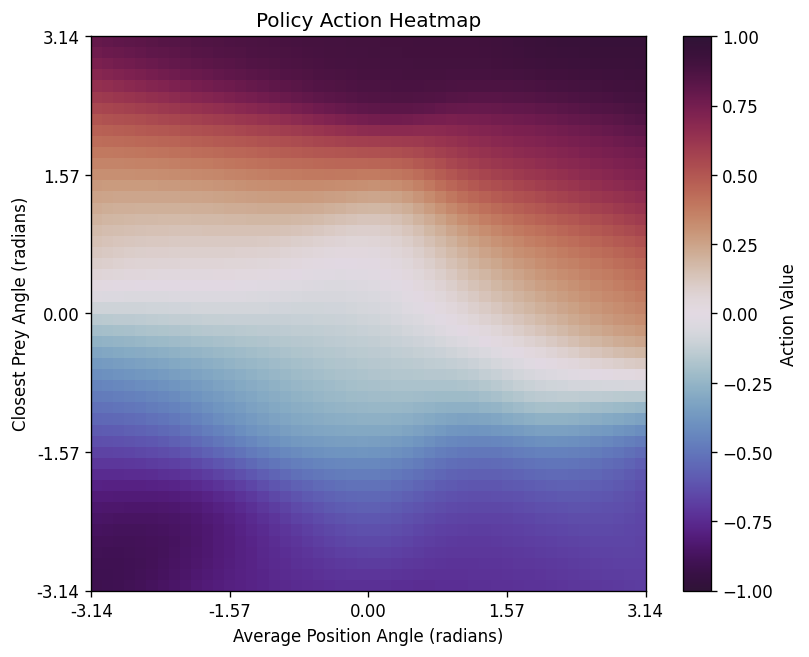

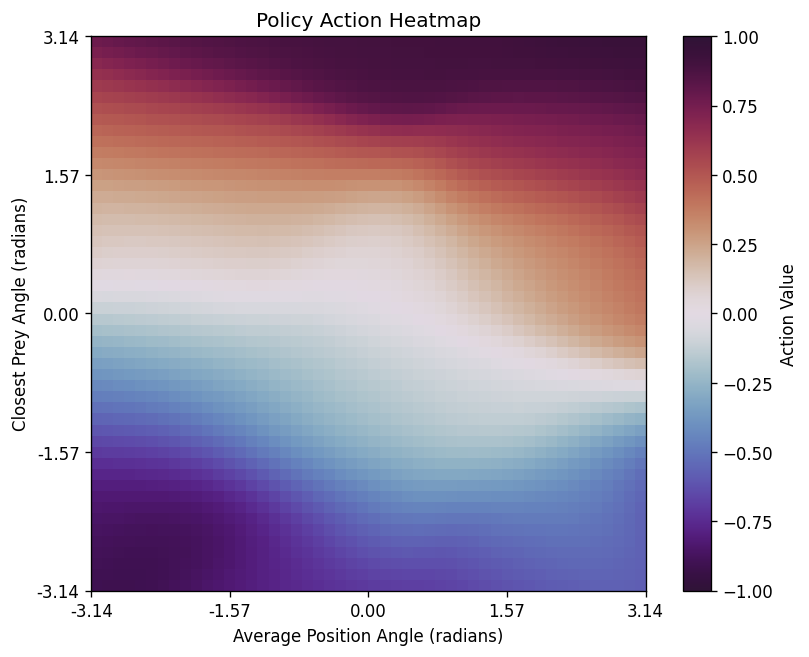

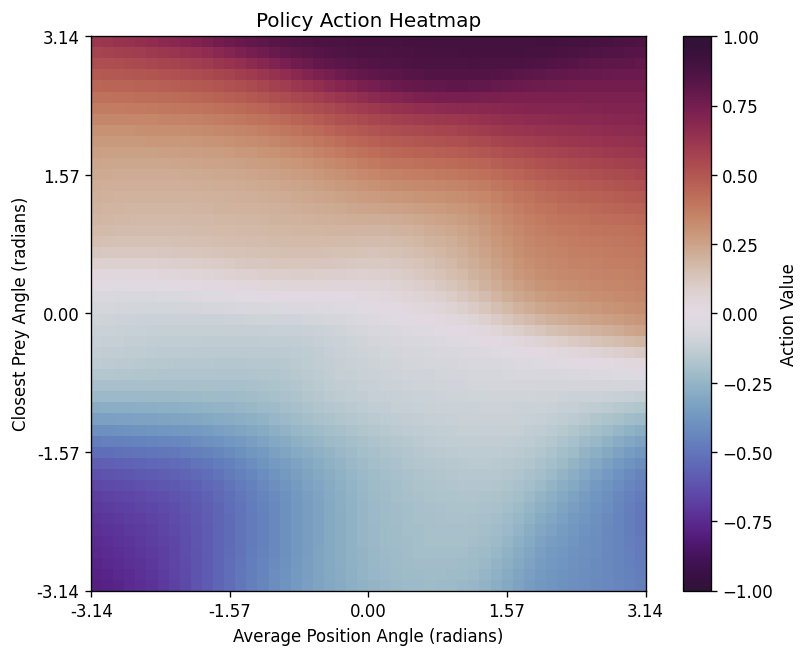

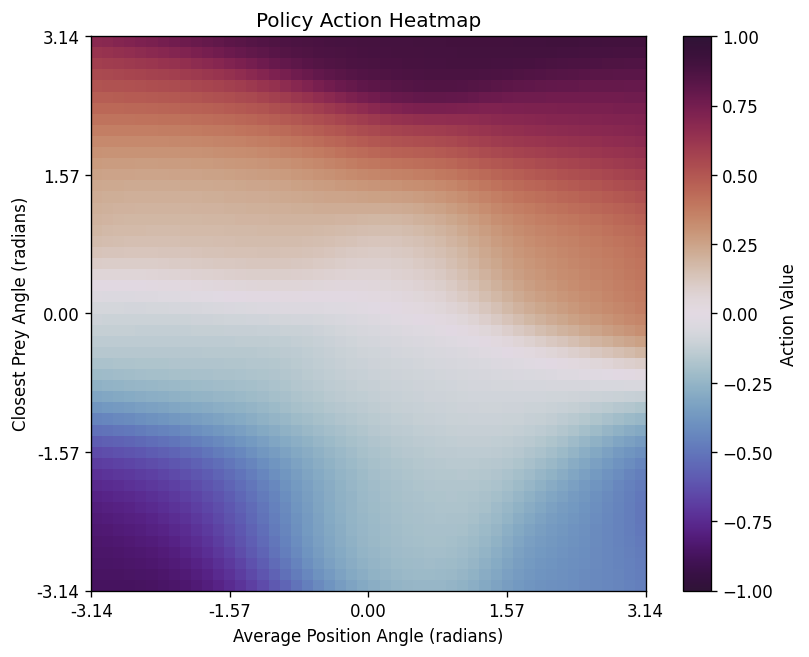

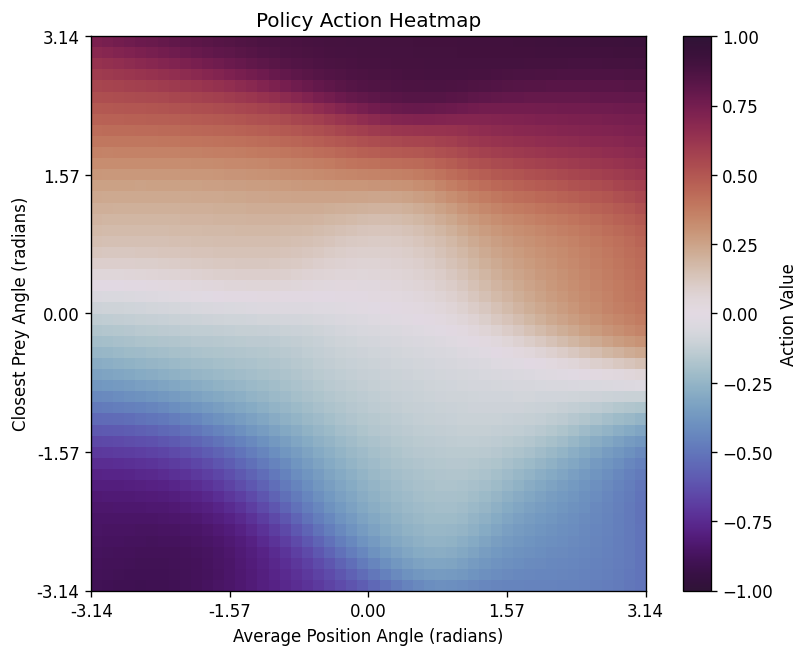

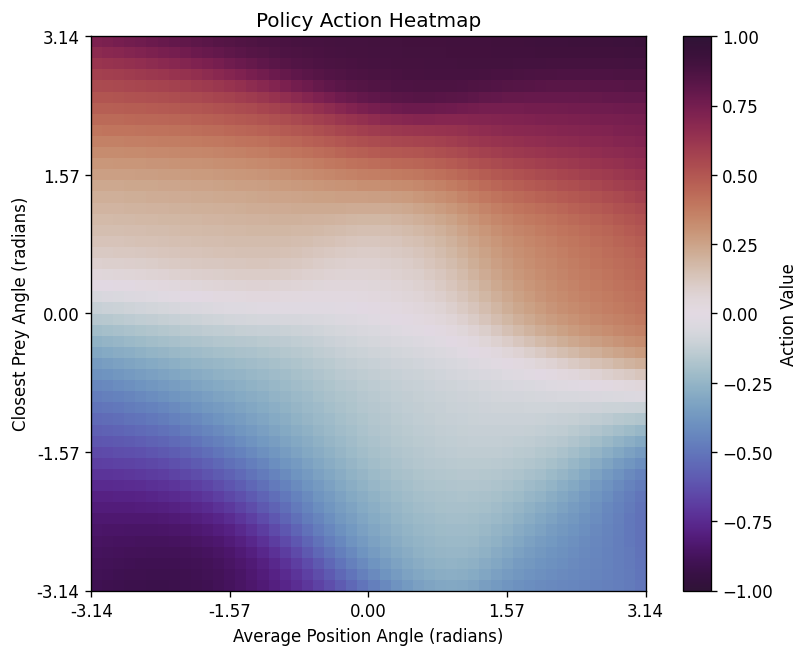

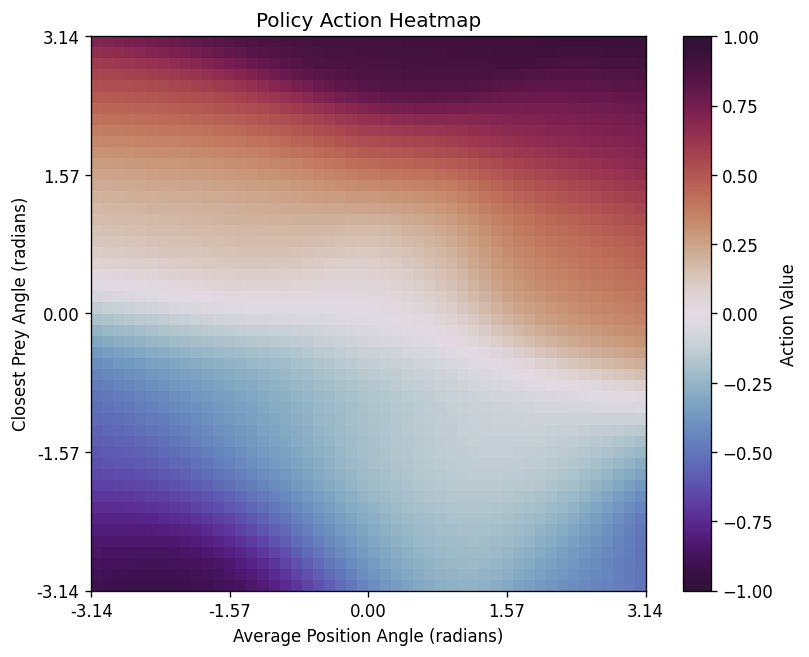

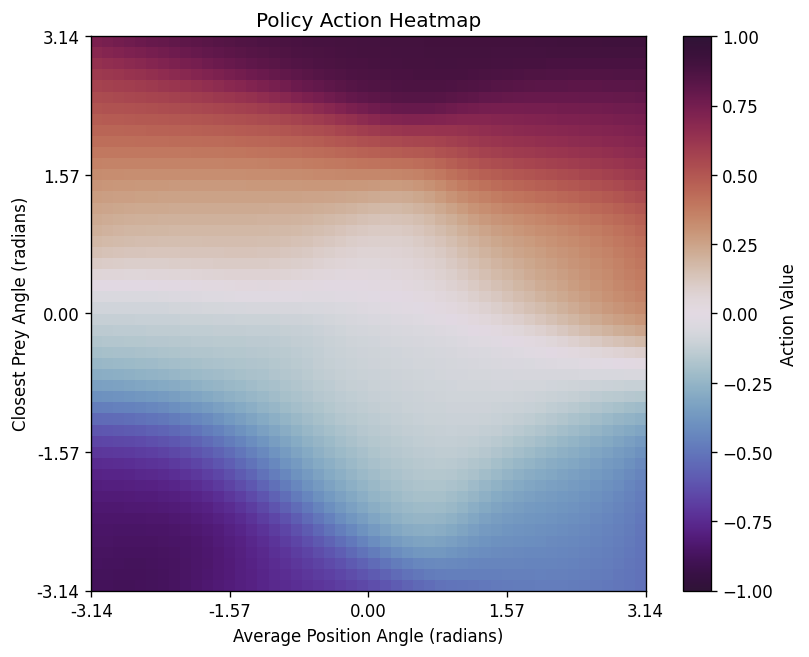

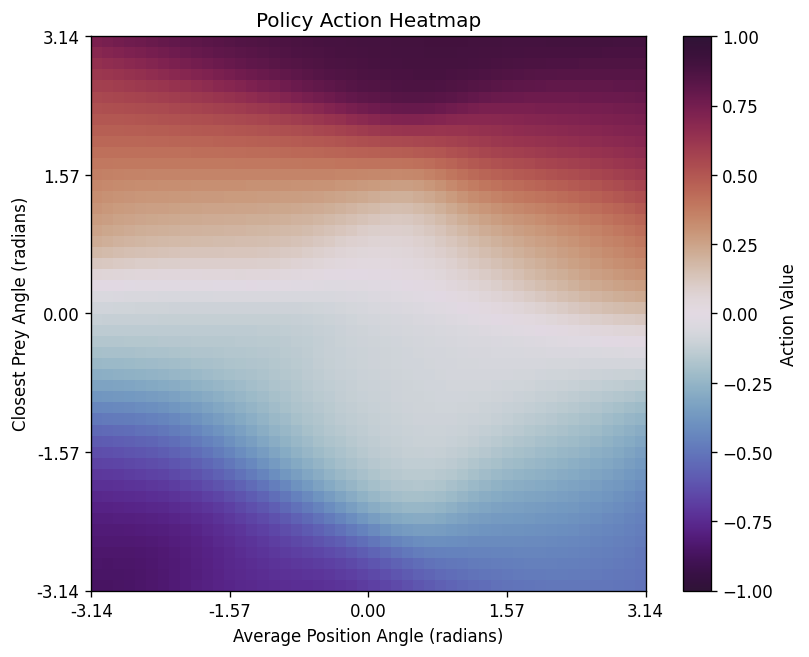

In [6]:
# 可以用下面的代码来调用函数
visualize_policy_heatmap(model, distance_to_home=10.0, closest_radius=1.0, mean_radius=3.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=10.0, closest_radius=2.0, mean_radius=3.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=10.0, closest_radius=5.0, mean_radius=3.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=10.0, closest_radius=4.0, mean_radius=3.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=10.0, closest_radius=3.0, mean_radius=3.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=10.0, closest_radius=3.0, mean_radius=4.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=10.0, closest_radius=3.0, mean_radius=5.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=10.0, closest_radius=3.0, mean_radius=2.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=10.0, closest_radius=3.0, mean_radius=1.0, num_points=50)

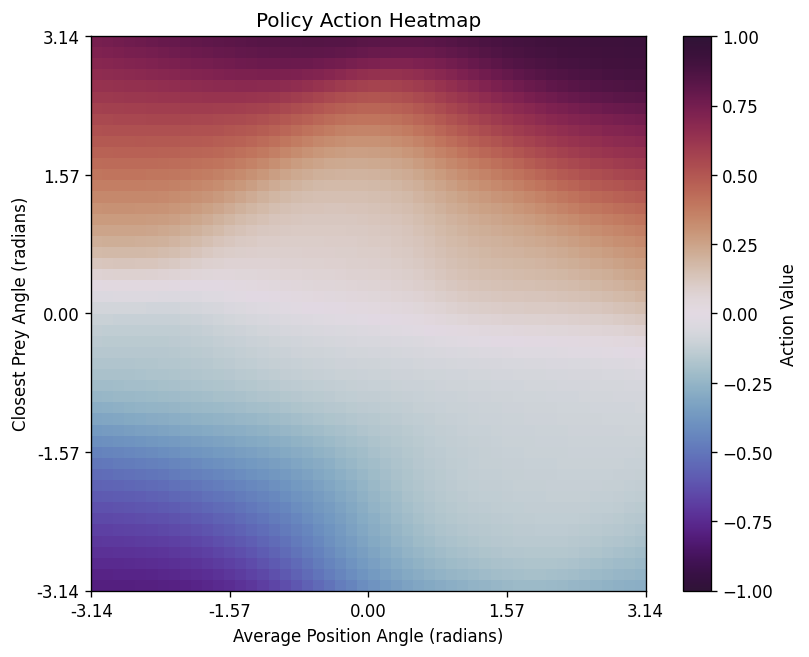

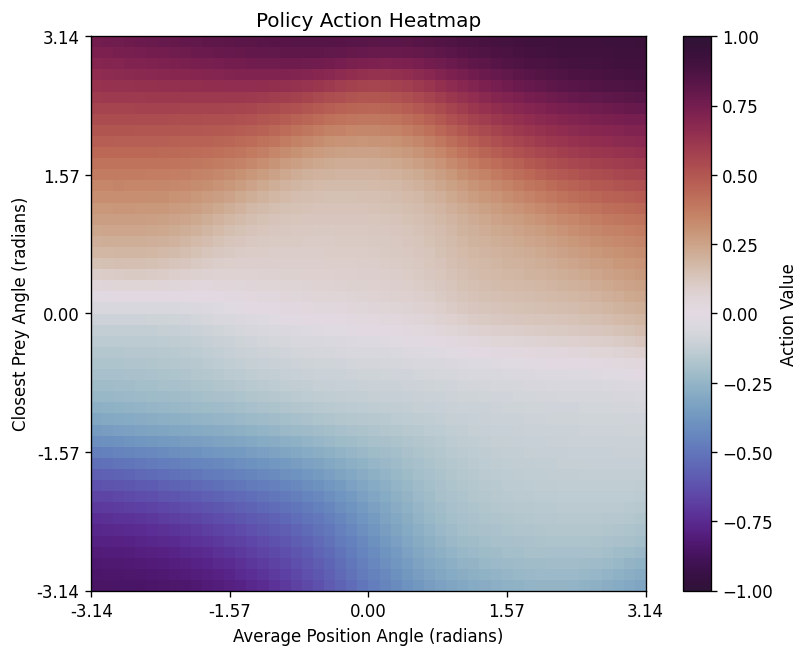

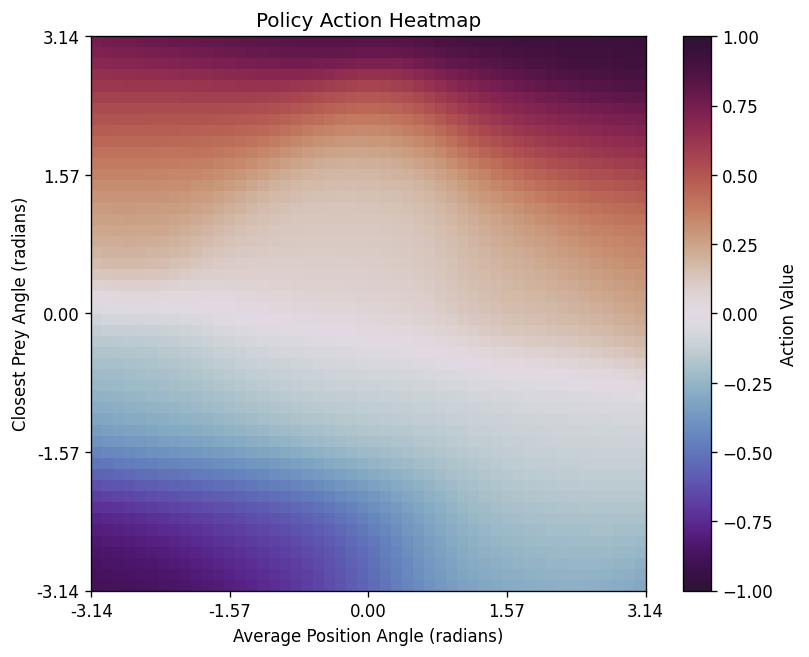

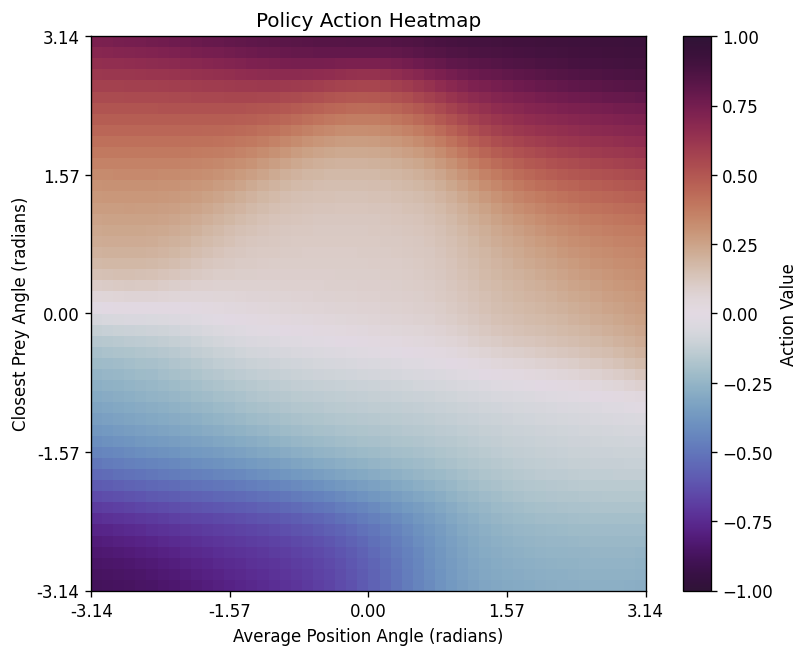

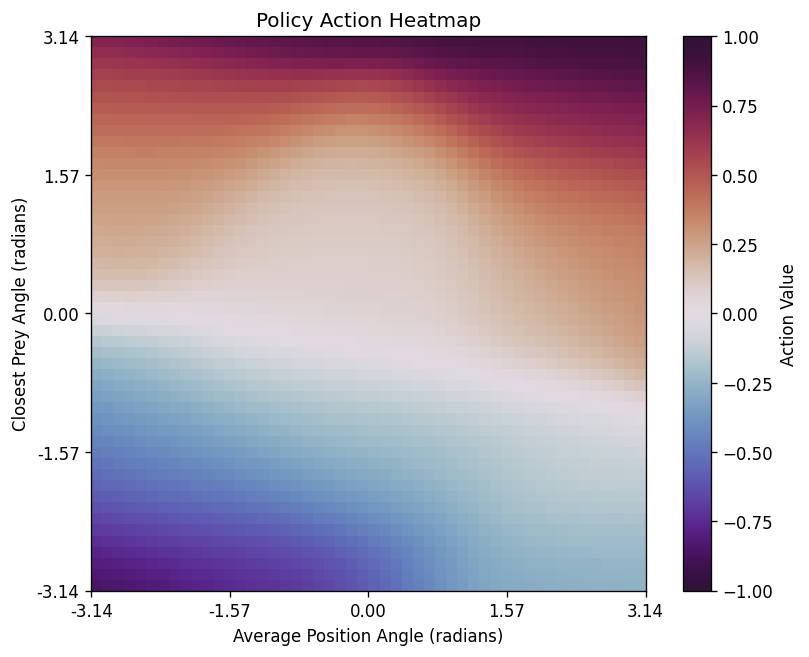

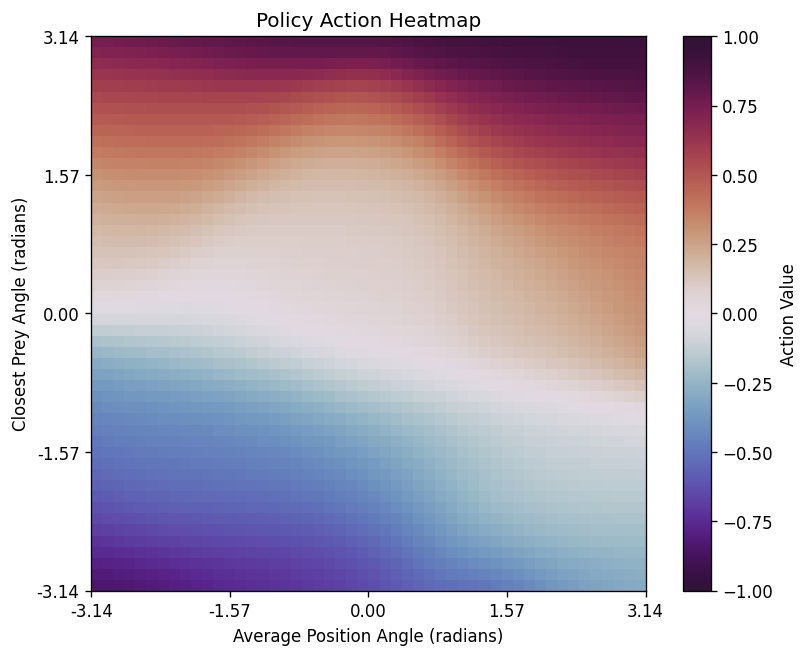

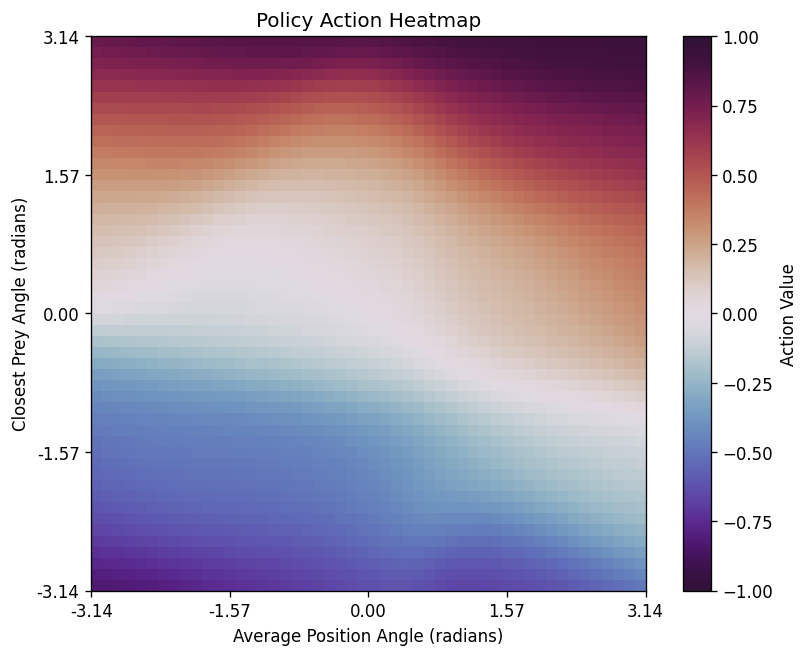

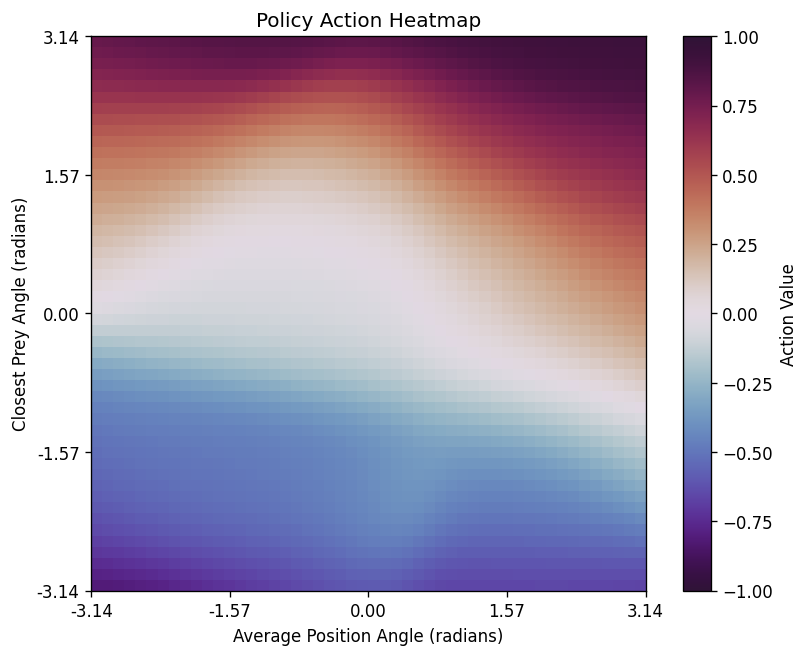

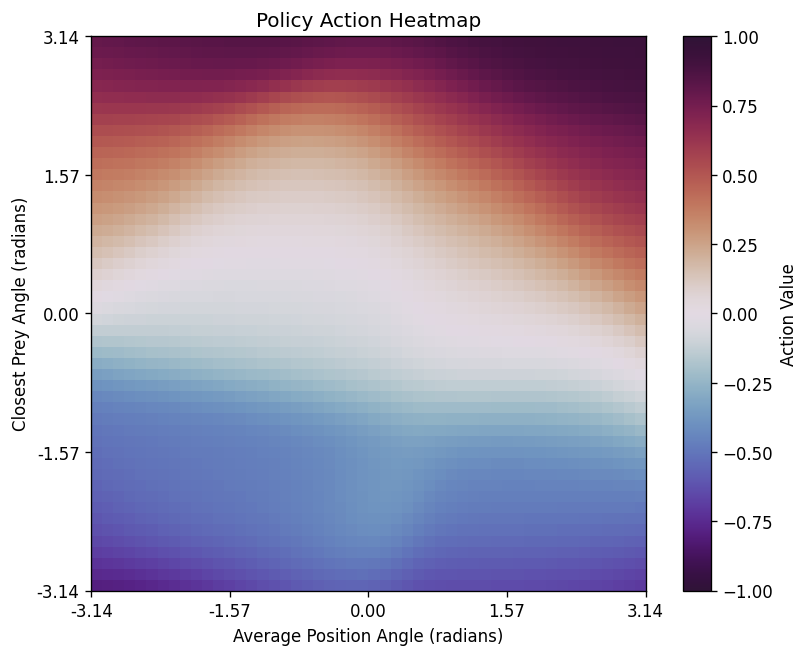

In [7]:
# 可以用下面的代码来调用函数
visualize_policy_heatmap(model, distance_to_home=25.0, closest_radius=5.0, mean_radius=1.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=25.0, closest_radius=5.0, mean_radius=2.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=25.0, closest_radius=5.0, mean_radius=3.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=25.0, closest_radius=5.0, mean_radius=4.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=25.0, closest_radius=5.0, mean_radius=5.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=25.0, closest_radius=4.0, mean_radius=5.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=25.0, closest_radius=3.0, mean_radius=5.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=25.0, closest_radius=2.0, mean_radius=5.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=25.0, closest_radius=1.0, mean_radius=5.0, num_points=50)

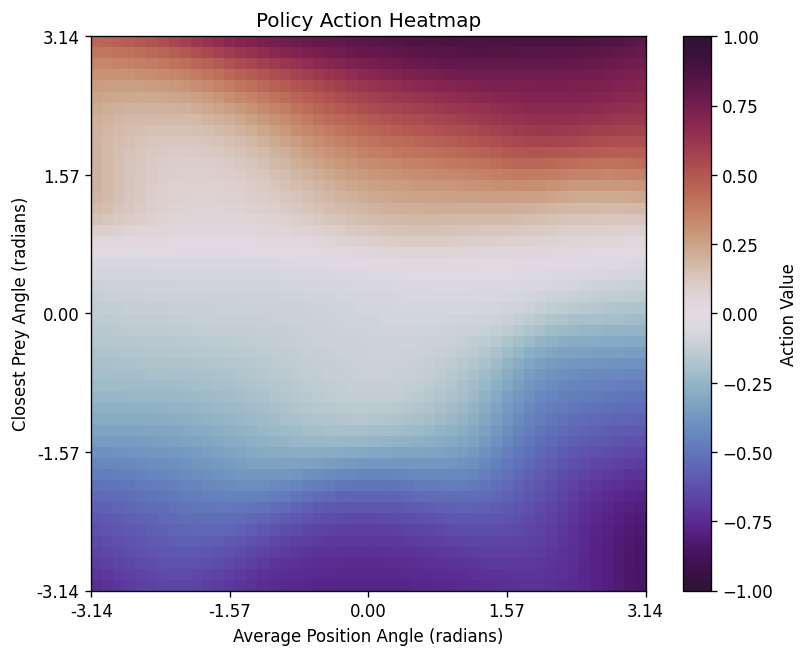

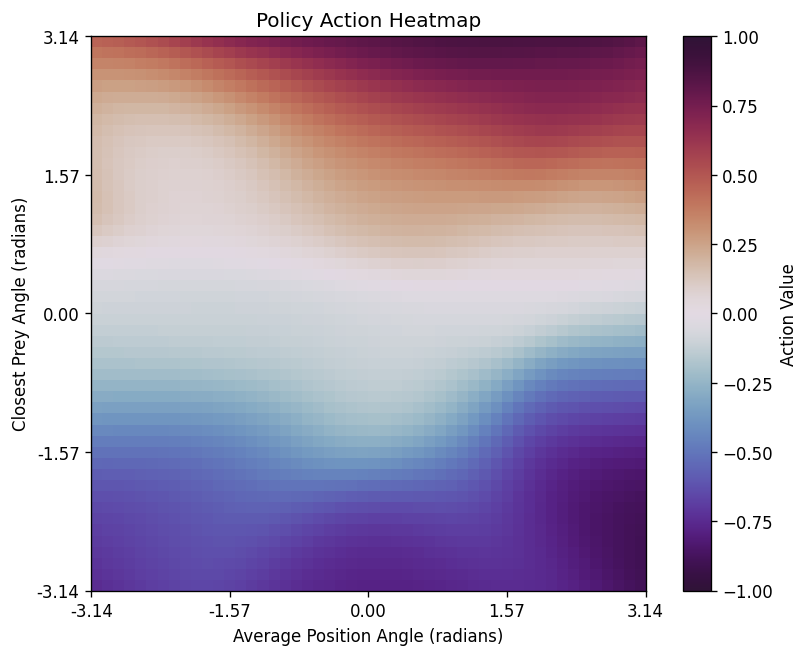

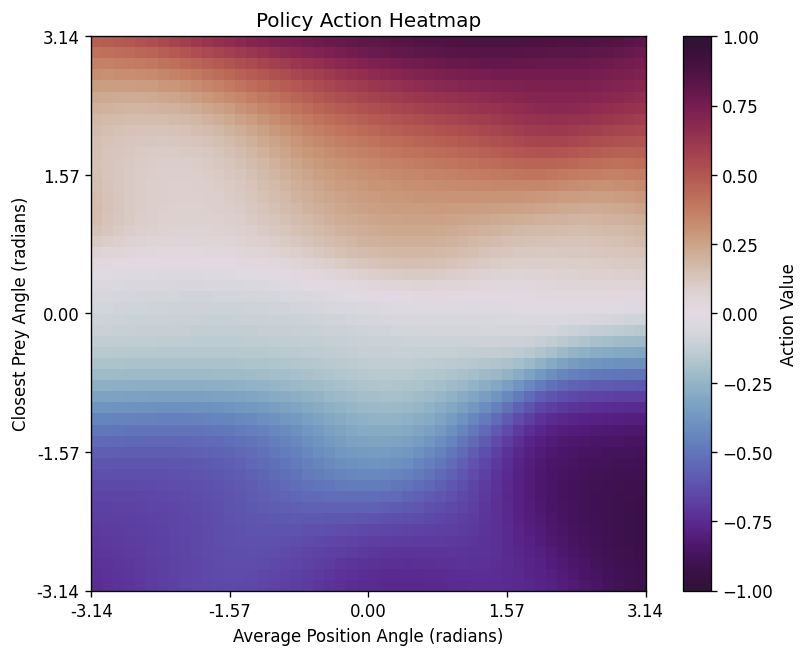

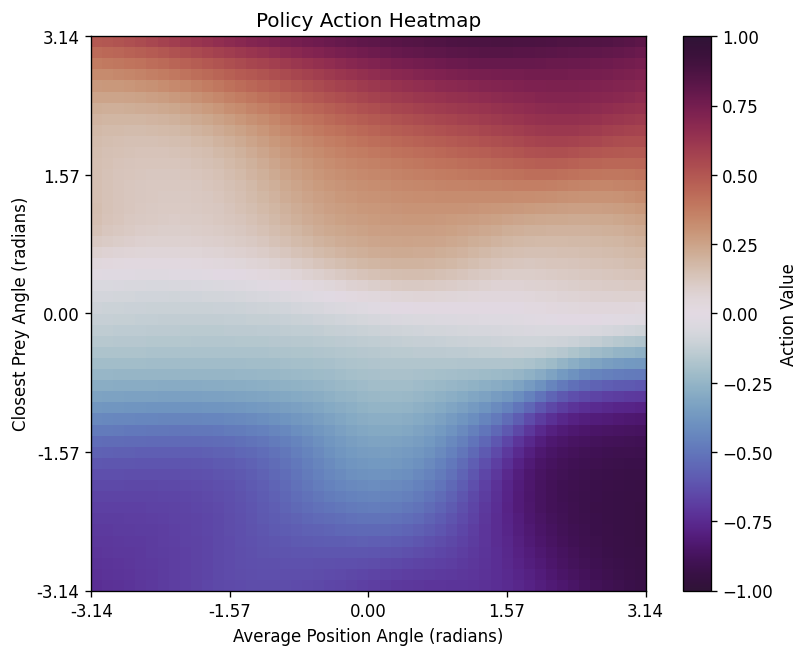

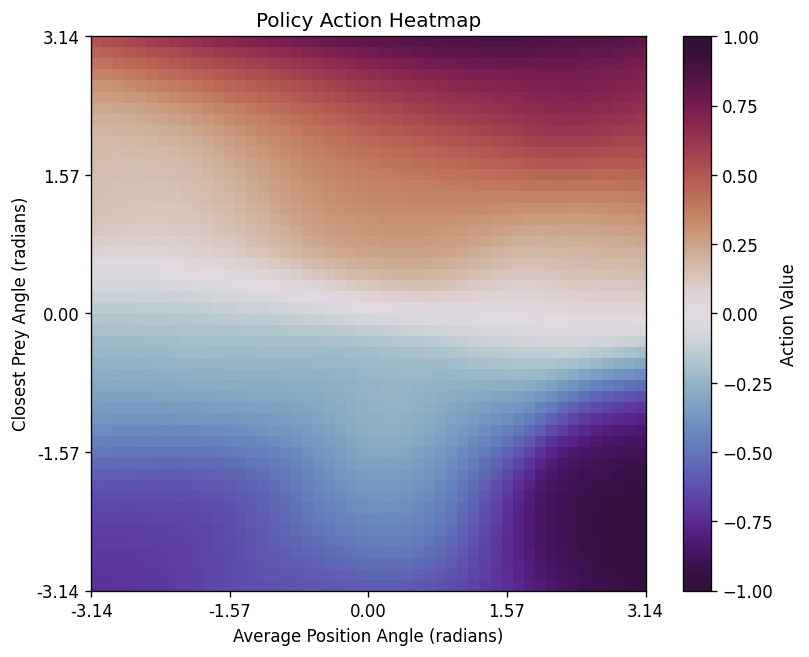

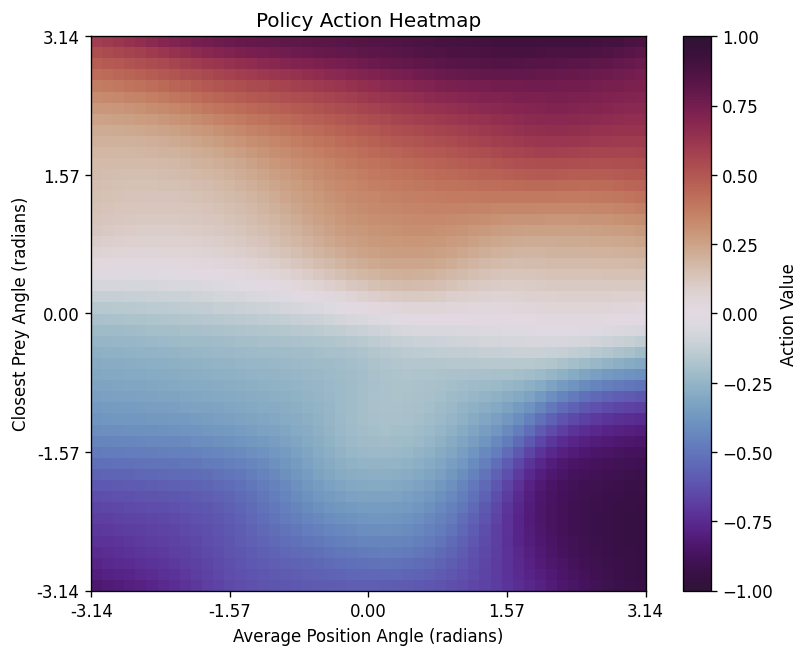

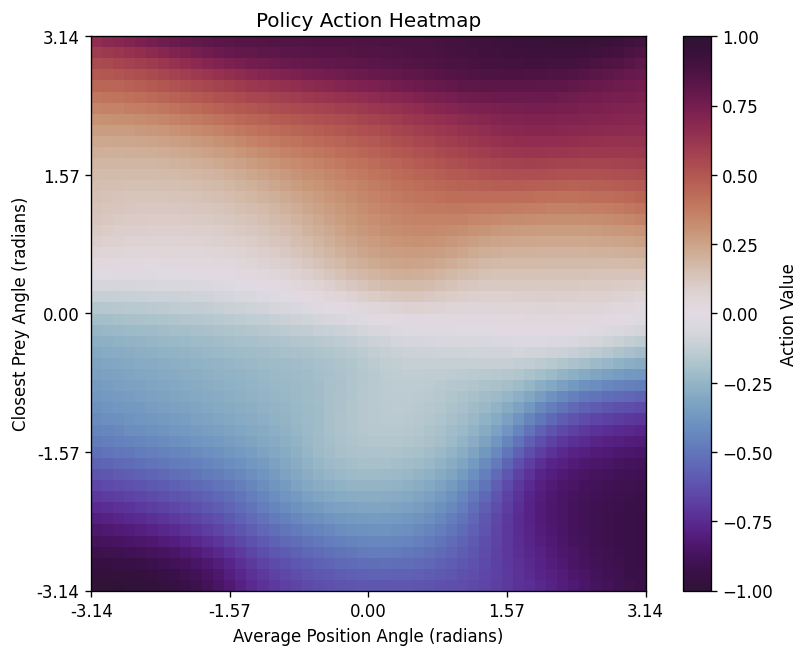

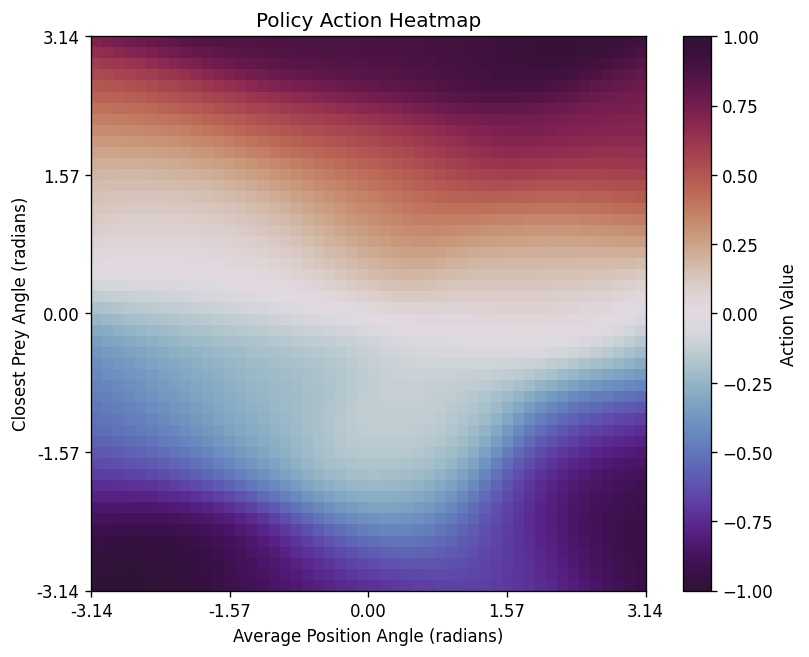

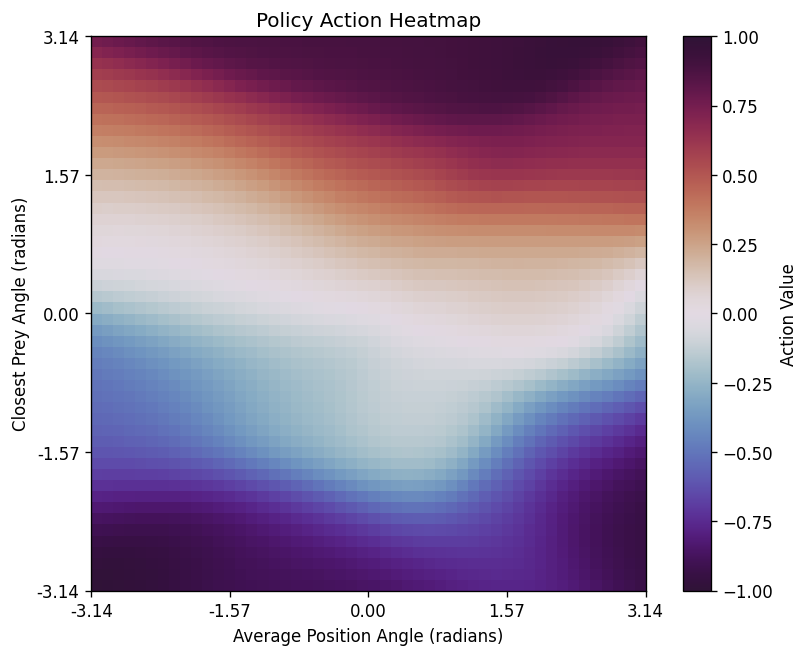

In [8]:
# 可以用下面的代码来调用函数
visualize_policy_heatmap(model, distance_to_home=0.0, closest_radius=5.0, mean_radius=1.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=0.0, closest_radius=5.0, mean_radius=2.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=0.0, closest_radius=5.0, mean_radius=3.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=0.0, closest_radius=5.0, mean_radius=4.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=0.0, closest_radius=5.0, mean_radius=5.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=0.0, closest_radius=4.0, mean_radius=5.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=0.0, closest_radius=3.0, mean_radius=5.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=0.0, closest_radius=2.0, mean_radius=5.0, num_points=50)
visualize_policy_heatmap(model, distance_to_home=0.0, closest_radius=1.0, mean_radius=5.0, num_points=50)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# 定义一个函数,将x映射到[-1, 1]之间
def map_to_minus_one_to_one(x):
    # 首先将x规范到[0, 2)区间
    x = x % 2
    # 然后根据x的值映射到[-1, 1]
    if x > 1:
        return x - 2  # 如果x在[1, 2)之间,映射到[-1, 0)
    else:
        return x      # 如果x在[0, 1]之间,直接返回
    
    
def visualize_relative_heatmap(model, distance_to_home, closest_radius, mean_radius, num_points=50):
    angles = np.linspace(-np.pi, np.pi, num_points)
    grid_x, grid_y = np.meshgrid(angles, angles)
    action_values = np.zeros_like(grid_x)
    action_minus_closest = np.zeros_like(grid_x)

    for i in range(num_points):
        for j in range(num_points):
            obs = {
                "distance_to_home": np.array([distance_to_home]),
                "average_position_of_visible_preys": np.array([mean_radius, grid_x[i, j]]),
                "closest_prey_position": np.array([closest_radius, grid_y[i, j]])
            }
            action, _ = model.predict(obs, deterministic=True)
            action_values[i, j] = action
            action_minus_closest[i, j] = map_to_minus_one_to_one(action_values[i, j] - grid_y[i, j]/np.pi)

    fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
    print(np.min(action_values), np.max(action_values))
    pos = ax.imshow(action_minus_closest, extent=(-np.pi, np.pi, -np.pi, np.pi), origin='lower', cmap='twilight_shifted', 
                    norm=Normalize(vmin=-1.0, vmax=1.0))
    ax.set_xlabel('Average Position Angle (radians)')
    ax.set_ylabel('Closest Prey Angle (radians)')
    ax.set_title('Policy Action Heatmap')
    fig.colorbar(pos, ax=ax, label='Action Value')
    plt.xticks(np.linspace(-np.pi, np.pi, 5), [f"{x:.2f}" for x in np.linspace(-np.pi, np.pi, 5)])
    plt.yticks(np.linspace(-np.pi, np.pi, 5), [f"{y:.2f}" for y in np.linspace(-np.pi, np.pi, 5)])
    plt.grid(False)
    plt.show()



-0.8255612850189209 0.928255558013916


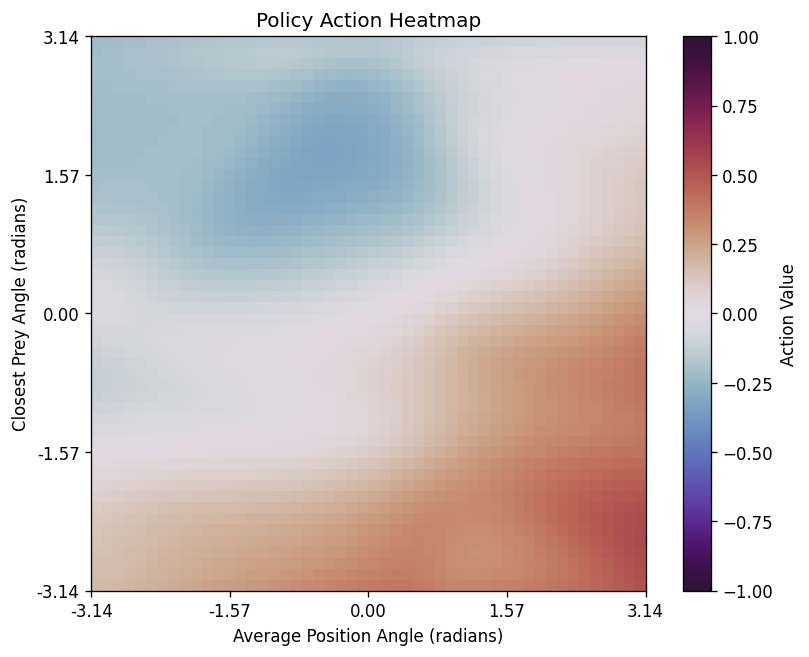

In [10]:
visualize_relative_heatmap(model, distance_to_home=25.0, closest_radius=3.0, mean_radius=5.0, num_points=50)

-0.9127147793769836 0.9623871445655823


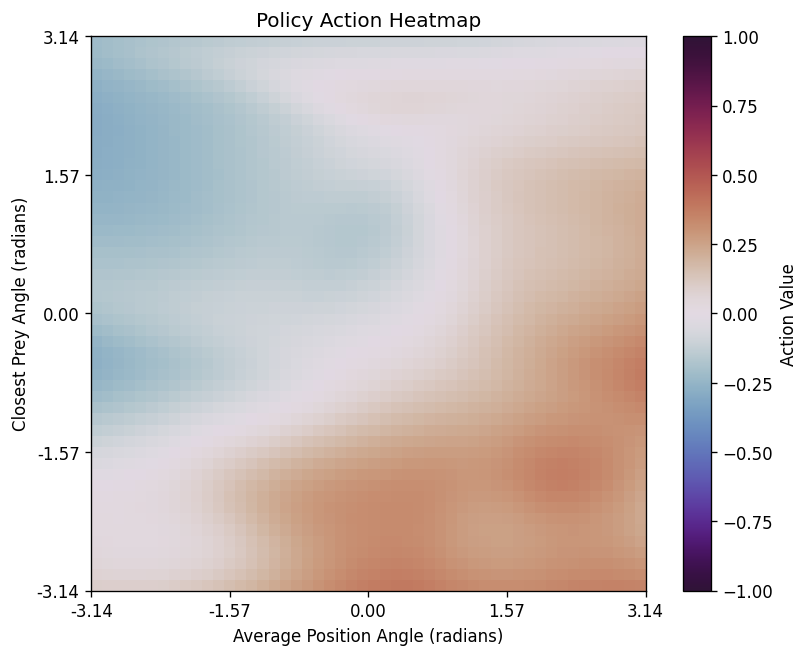

In [11]:
visualize_relative_heatmap(model, distance_to_home=10.0, closest_radius=1.2, mean_radius=5.0, num_points=50)

-0.7828353047370911 0.9006748795509338


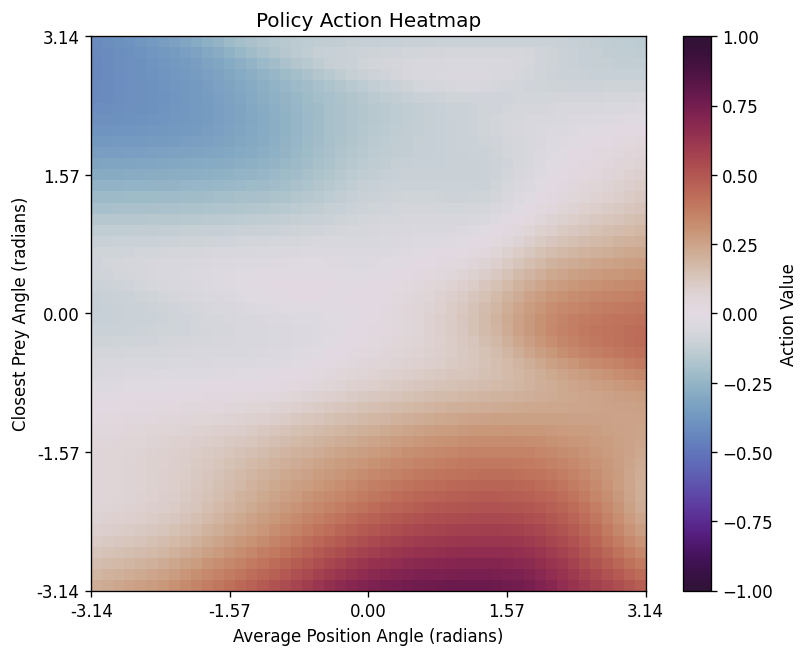

In [12]:
visualize_relative_heatmap(model, distance_to_home=10.0, closest_radius=5.0, mean_radius=5.0, num_points=50)

-0.8578674793243408 0.8775219917297363


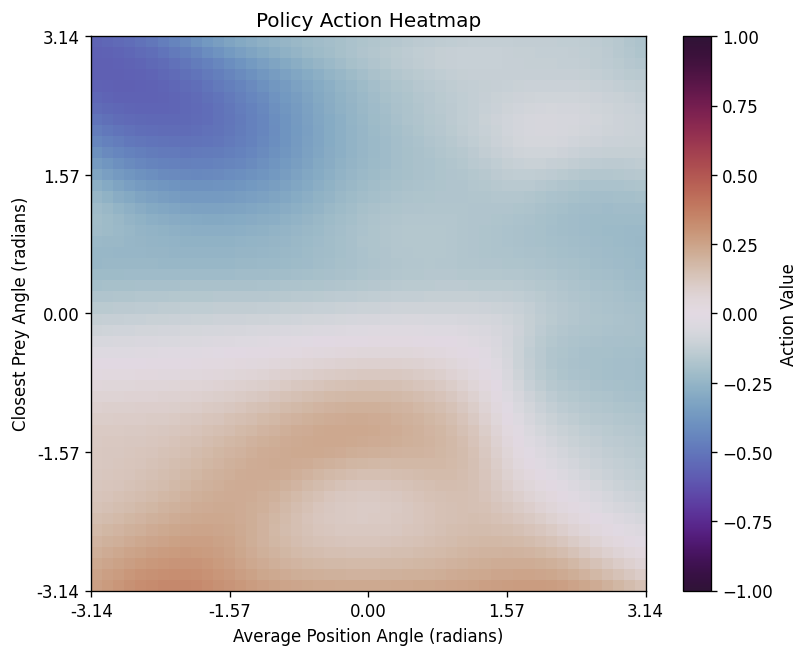

-0.8962271213531494 0.8767741918563843


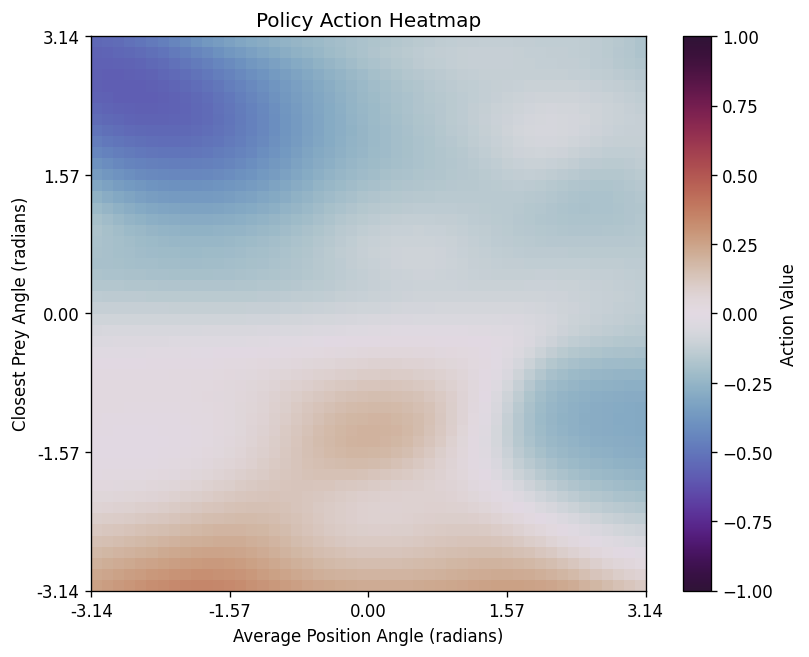

-0.9246464371681213 0.8766207695007324


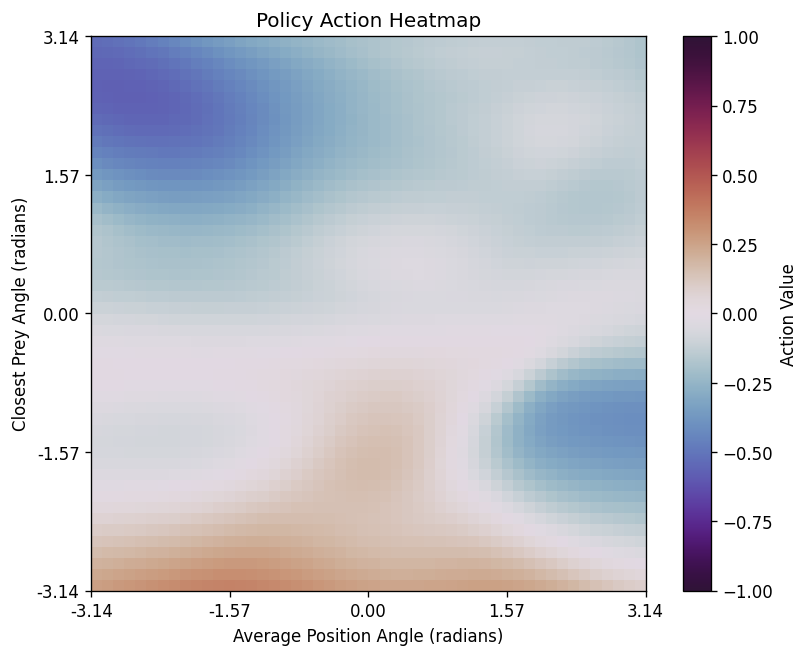

-0.9434176087379456 0.8750281929969788


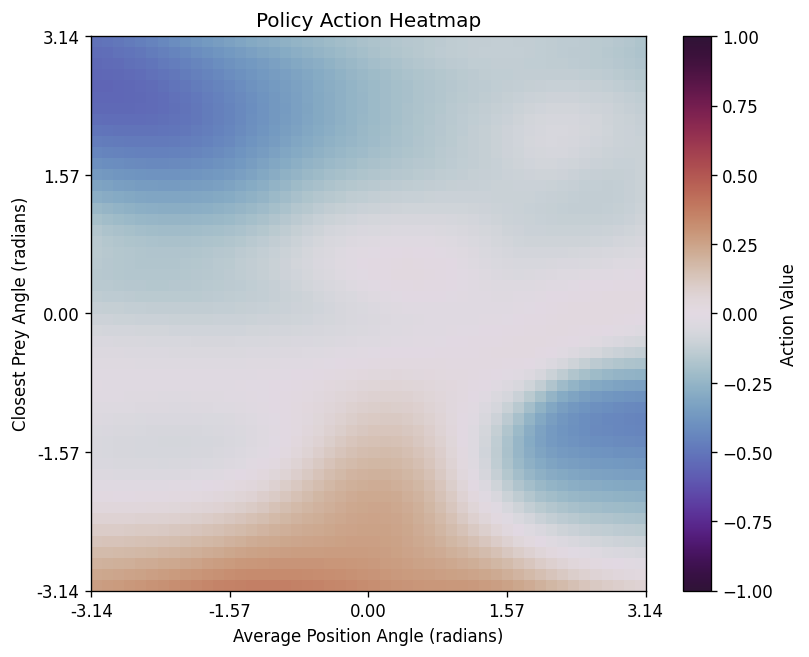

-0.9538210034370422 0.8697606921195984


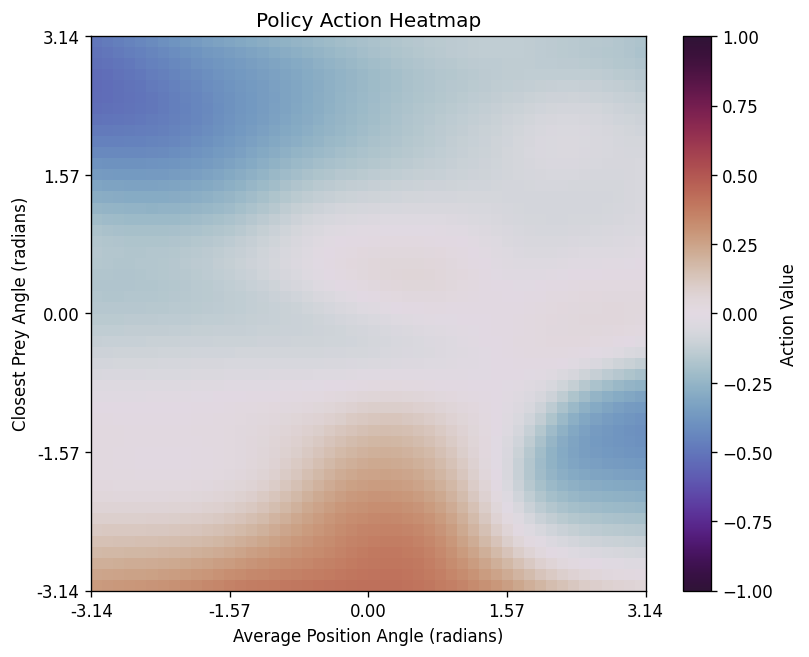

-0.946904718875885 0.9115893840789795


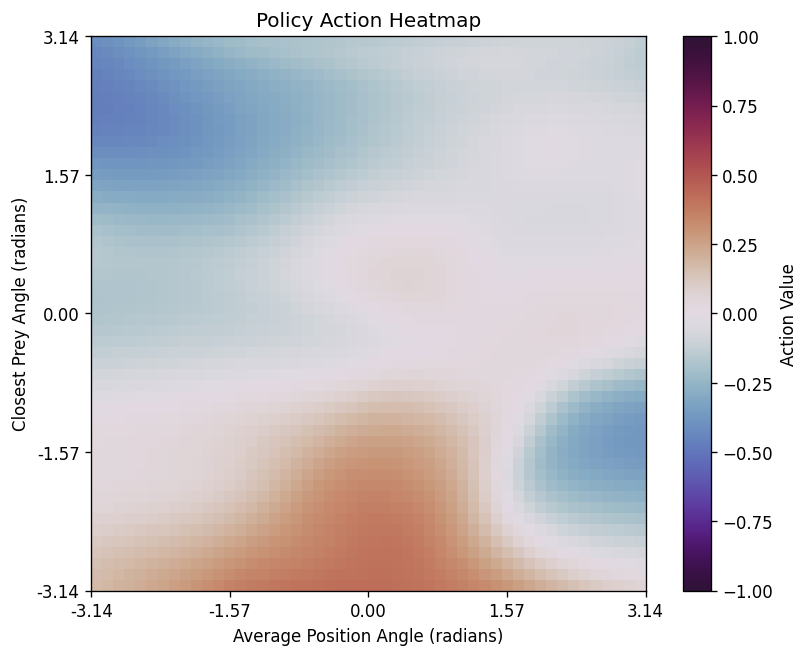

-0.9945292472839355 0.943210780620575


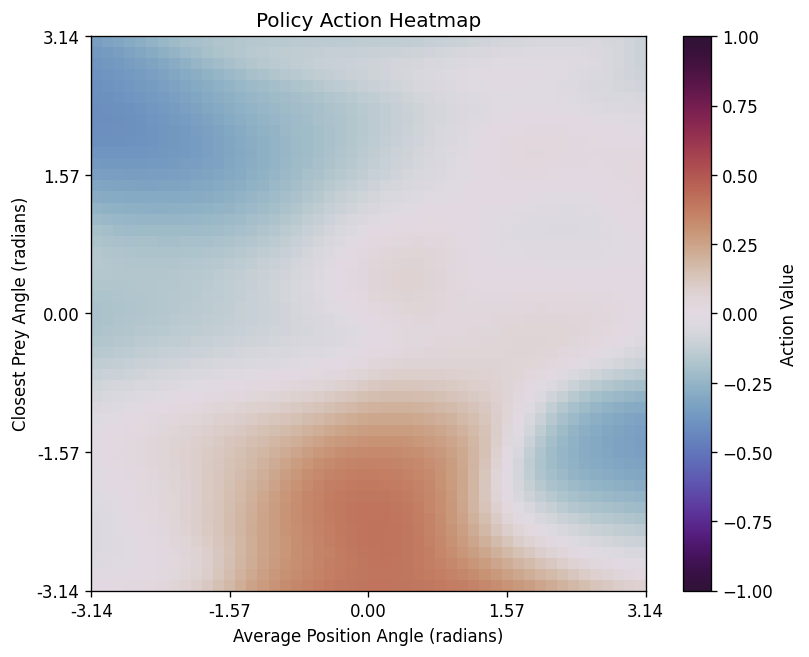

-1.0 0.9530063271522522


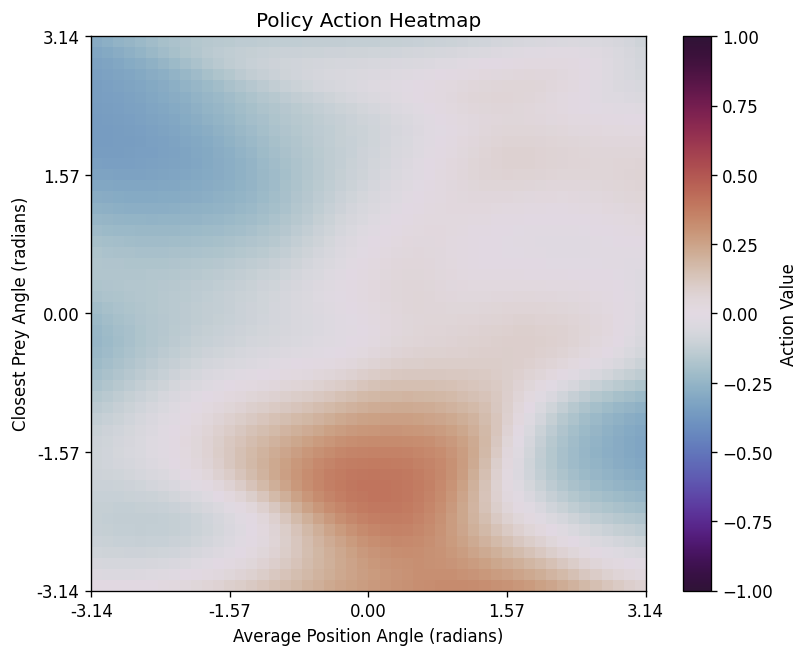

-0.9940074682235718 0.9533186554908752


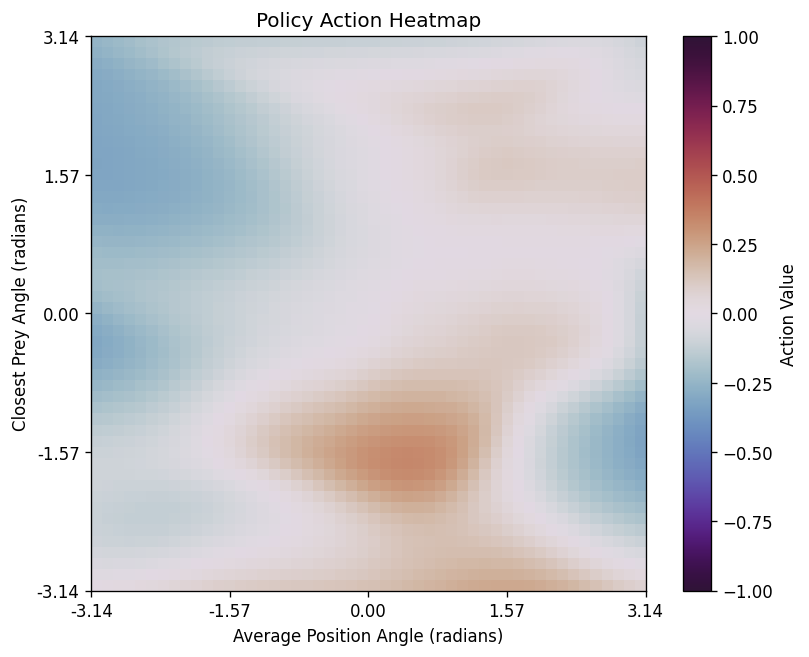

In [13]:
# 可以用下面的代码来调用函数
visualize_relative_heatmap(model, distance_to_home=0.0, closest_radius=5.0, mean_radius=1.0, num_points=50)
visualize_relative_heatmap(model, distance_to_home=0.0, closest_radius=5.0, mean_radius=2.0, num_points=50)
visualize_relative_heatmap(model, distance_to_home=0.0, closest_radius=5.0, mean_radius=3.0, num_points=50)
visualize_relative_heatmap(model, distance_to_home=0.0, closest_radius=5.0, mean_radius=4.0, num_points=50)
visualize_relative_heatmap(model, distance_to_home=0.0, closest_radius=5.0, mean_radius=5.0, num_points=50)
visualize_relative_heatmap(model, distance_to_home=0.0, closest_radius=4.0, mean_radius=5.0, num_points=50)
visualize_relative_heatmap(model, distance_to_home=0.0, closest_radius=3.0, mean_radius=5.0, num_points=50)
visualize_relative_heatmap(model, distance_to_home=0.0, closest_radius=2.0, mean_radius=5.0, num_points=50)
visualize_relative_heatmap(model, distance_to_home=0.0, closest_radius=1.0, mean_radius=5.0, num_points=50)

-0.8481965661048889 0.9328644871711731


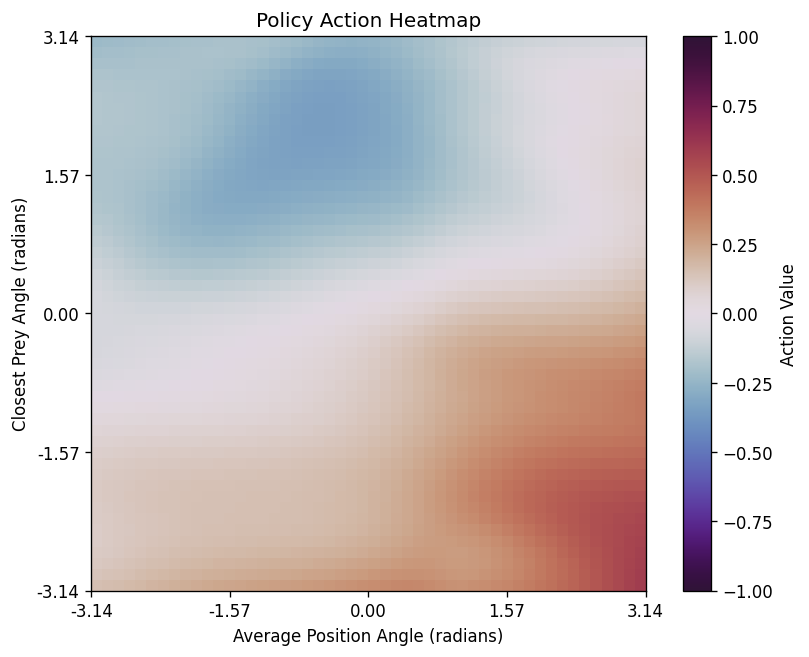

In [14]:
visualize_relative_heatmap(model, distance_to_home=30.0, closest_radius=4, mean_radius=4, num_points=50)

-1.0 0.9345894455909729


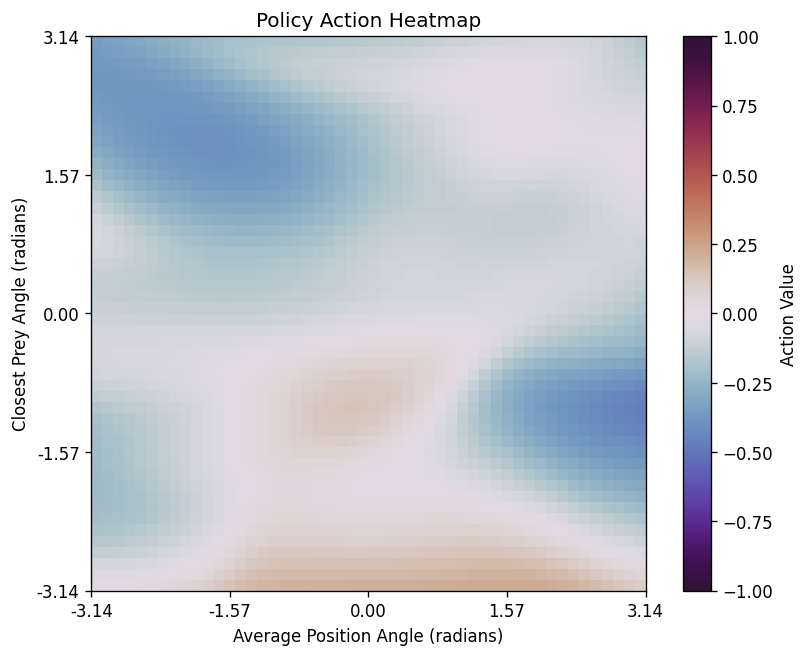

In [15]:
visualize_relative_heatmap(model, distance_to_home=0.0, closest_radius=3.0, mean_radius=2.0, num_points=50)
